In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import label_stats as ls
from skimage import io
from glob import glob
import os
from pathlib import Path
from scipy.stats import skew, skewtest

In [2]:
data_dir = '/Users/kategroschner/Box Sync/Research/HR-TEM/particleRecognition/*'

In [3]:
data_files = glob(data_dir)

In [4]:
len(data_files)

7

In [5]:
label_dict = {'101729F':{'yes':0,'no':0,'null':0},'101727H':{'yes':0,'no':0,'null':0}}
size_dict = {'101729F':[],'101727H': []}
for file in data_files:
    yes = 0
    no = 0
    null = 0
    txt_names = file + '/*/adjustedPNG2/*.txt' 
    txt_files = glob(txt_names)
    for txt in txt_files:
        if '101727H' in txt.split('/')[-3]:
            sample = '101727H'
        elif '101729F' in txt.split('/')[-3]:
            sample = '101729F'
        else:
            print(txt.split('/')[-3])
            raise RuntimeError('Sample not identified or of unexpected label. Please check file naming scheme.')
        _, radii, labels, _ = ls.txt_reader(txt)
        for label in labels:
            if label == 'yes':
                label_dict[sample]['yes']+=1
            elif label == 'no':
                label_dict[sample]['no']+=1
            elif label == 'null':
                label_dict[sample]['null']+=1
        for radius in radii:
            size_dict[sample].append(radius)

In [6]:
size_corr_H  = {'yes':[],'no': [], 'null': []}
size_corr_F = {'yes':[],'no': [], 'null': []}
for file in data_files:
    txt_names = file + '/*/adjustedPNG2/*.txt' 
    txt_files = glob(txt_names)
    for txt in txt_files:
        if '101727H' in txt.split('/')[-3]:
            sample = '101727H'
        elif '101729F' in txt.split('/')[-3]:
            sample = '101729F'
        else:
            print(txt.split('/')[-3])
            raise RuntimeError('Sample not identified or of unexpected label. Please check file naming scheme.')
        _, radii, labels, _ = ls.txt_reader(txt)
        for idx, label in enumerate(labels):
            if label == 'yes':
                if sample == '101727H':
                    size_corr_H['yes'].append(radii[idx]*0.033*2)
                else:
                    size_corr_F['yes'].append(radii[idx]*0.033*2)
            elif label == 'no':
                if sample == '101727H':
                    size_corr_H['no'].append(radii[idx]*0.033*2)
                else:
                    size_corr_F['no'].append(radii[idx]*0.033*2)
            elif label == 'null':
                if sample == '101727H':
                    size_corr_H['null'].append(radii[idx]*0.033*2)
                else:
                    size_corr_F['null'].append(radii[idx]*0.033*2)

# Particle Stats:

## Stats on 101727H

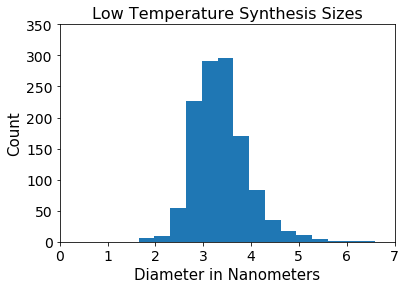

In [14]:
_ = plt.hist(np.multiply(size_dict['101727H'],0.033*2),bins =15)
_= plt.title('Low Temperature Synthesis Sizes', fontsize=16)
_ = plt.xlabel('Diameter in Nanometers', fontsize = 15)
ax = plt.gca()
ax.tick_params(axis = 'both',labelsize=14)
_ = plt.ylabel('Count', fontsize = 15)
_ = plt.ylim([0,350])
_ = plt.xlim([0,7])

In [27]:
print('*101727H Stats*')
print('\n')
print('mean diameter: {0:.2f}, std: {1:.2f}'.format(np.array(size_dict['101727H']).mean()*0.033*2,np.array(size_dict['101727H']).std()*0.033))
print('\n')
sum_101727H = label_dict['101727H']['yes'] + label_dict['101727H']['no'] + label_dict['101727H']['null']
print('total particles identified: {}'.format(sum_101727H))
print('\n')
print('Makeup of labeled particles: yes {0:.2f}%, no {1:.2f}%, null {2:.2f}%'.format(label_dict['101727H']['yes']/sum_101727H*100,label_dict['101727H']['no']/sum_101727H*100,label_dict['101727H']['null']/sum_101727H*100))
percent_yes = (label_dict['101727H']['yes']/(label_dict['101727H']['yes']+label_dict['101727H']['no']))*100
percent_no = (label_dict['101727H']['no']/(label_dict['101727H']['yes']+label_dict['101727H']['no']))*100
print('Makeup of atomic resolution particles: yes {0:.2f}%, no {1:.2f}%'.format(percent_yes,percent_no))


*101727H Stats*


mean diameter: 3.44, std: 0.27


total particles identified: 656


Makeup of labeled particles: yes 18.75%, no 13.41%, null 67.84%
Makeup of atomic resolution particles: yes 58.29%, no 41.71%


In [38]:
H_nm_array = np.multiply(np.array(size_dict['101727H']),0.033*2)
H_skew = skew(H_nm_array)
print(H_skew)
skewtest(H_nm_array)

1.0968974772967353


SkewtestResult(statistic=9.5798966202987987, pvalue=9.7142121282675706e-22)

## Stats on 101729F

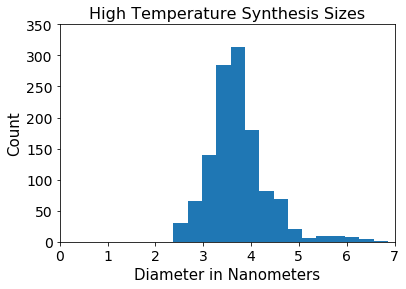

In [15]:
_ = plt.hist(np.multiply(size_dict['101729F'],0.033*2),bins =15)
_= plt.title('High Temperature Synthesis Sizes', fontsize=16)
_ = plt.xlabel('Diameter in Nanometers', fontsize = 15)
ax = plt.gca()
ax.tick_params(axis = 'both',labelsize=14)
_ = plt.ylabel('Count', fontsize = 15)
_ = plt.ylim([0,350])
_ = plt.xlim([0,7])

In [28]:
print('*101729F Stats*')
print('\n')
print('mean diameter: {0:.2f}, std: {1:.2f}'.format(np.array(size_dict['101729F']).mean()*0.033*2,np.array(size_dict['101729F']).std()*0.033))
print('\n')
sum_101729F = label_dict['101729F']['yes'] + label_dict['101729F']['no'] + label_dict['101729F']['null']
print('total particles identified: {}'.format(sum_101729F))
print('\n')
print('Makeup of labeled particles: yes {0:.2f}%, no {1:.2f}%, null {2:.2f}%'.format(label_dict['101729F']['yes']/sum_101729F*100,label_dict['101729F']['no']/sum_101729F*100,label_dict['101729F']['null']/sum_101729F*100))
percent_yes = (label_dict['101729F']['yes']/(label_dict['101729F']['yes']+label_dict['101729F']['no']))*100
percent_no = (label_dict['101729F']['no']/(label_dict['101729F']['yes']+label_dict['101729F']['no']))*100
print('Makeup of atomic resolution particles: yes {0:.2f}%, no {1:.2f}%'.format(percent_yes,percent_no))

*101729F Stats*


mean diameter: 3.71, std: 0.30


total particles identified: 1222


Makeup of labeled particles: yes 17.43%, no 11.29%, null 71.28%
Makeup of atomic resolution particles: yes 60.68%, no 39.32%


In [36]:
F_nm_array = np.multiply(np.array(size_dict['101729F']),0.033*2)
F_skew = skew(F_nm_array)
print(F_skew)

1.4399238730611885


In [40]:
skewtest(F_nm_array)

SkewtestResult(statistic=15.6713401335474, pvalue=2.3751800003390184e-55)

## Exploration

In [41]:
sort_H = np.sort(H_nm_array)
sort_F = np.sort(F_nm_array)

In [50]:
lim_H = np.array([x for x in sort_H if x < 5.5])
lim_F = np.array([x for x in sort_F if x < 5.5])

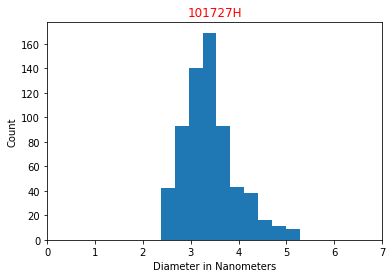

In [51]:
_ = plt.hist(lim_H,bins =10)
_= plt.title('101727H',color = 'r')
_ = plt.xlabel('Diameter in Nanometers')
_ = plt.ylabel('Count')
# _ = plt.ylim([0,350])
_ = plt.xlim([0,7])

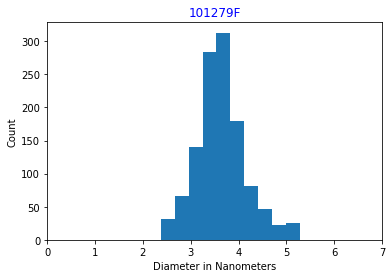

In [52]:
_ = plt.hist(lim_F,bins =10)
_ = plt.title('101279F', color = 'b')
_ = plt.xlabel('Diameter in Nanometers')
_ = plt.ylabel('Count')
# _ = plt.ylim([0,350])
_ = plt.xlim([0,7])

In [53]:
print('mean diameter H: {0:.2f}, std: {1:.2f}'.format(lim_H.mean(),lim_H.std()))
print('mean diameter F: {0:.2f}, std: {1:.2f}'.format(lim_F.mean(),lim_F.std()))


mean diameter H: 3.43, std: 0.51
mean diameter F: 3.66, std: 0.48


In [54]:
print('Skew of H: {}'.format(skew(lim_H)))
print('Skew of F: {}'.format(skew(lim_F)))

Skew of H: 0.7533335397259423
Skew of F: 0.526079823799774


In [55]:
print('Skewtest of H: {}'.format(skewtest(lim_H)))
print('Skewtest of F: {}'.format(skewtest(lim_F)))

Skewtest of H: SkewtestResult(statistic=7.1377945343285898, pvalue=9.4840249954096212e-13)
Skewtest of F: SkewtestResult(statistic=7.023741062336736, pvalue=2.160049632502937e-12)


In [57]:
print('Number of particles in F < 5.5nm: {}'.format(len(lim_F)))
print('Number of particles in F >= 5.5nm: {}'.format(len([x for x in sort_F if x >= 5.5])))

Number of particles in F < 5.5nm: 1190
Number of particles in F >= 5.5nm: 32


In [58]:
print('Number of particles in H < 5.5nm: {}'.format(len(lim_H)))
print('Number of particles in H >= 5.5nm: {}'.format(len([x for x in sort_H if x >= 5.5])))

Number of particles in H < 5.5nm: 654
Number of particles in H >= 5.5nm: 2


## Correlations between size and stacking faults

(2,)


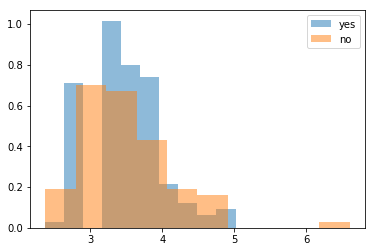

In [129]:
total_H = 1222
H_corrs = np.array([size_corr_H['yes'],size_corr_H['no']])
print(H_corrs.shape)
_ = plt.hist(size_corr_H['yes'], alpha = 0.5, label = 'yes',bins =10,density = True)
_ = plt.hist(size_corr_H['no'], alpha = 0.5, label = 'no',bins =10,density = True)
plt.legend(loc='upper right')

Text(0,0.5,'Density')

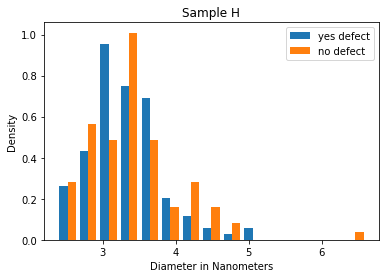

In [128]:
_ = plt.hist(H_corrs, label = ['yes defect','no defect'], bins = 15,density = True)
plt.legend(loc='upper right')
# plt.ylim([0,60])
plt.title('Low Temperature Synthesis Size and Defects', fontsize = 16)
plt.xlabel('Diameter in Nanometers')
plt.ylabel('Density')

Text(0,0.5,'Density')

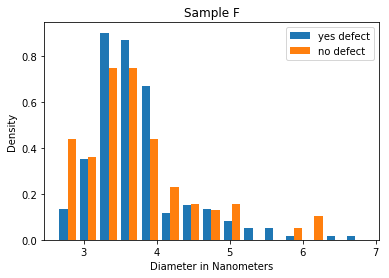

In [127]:
_ = plt.hist(F_corrs, label = ['yes defect','no defect'], bins = 15,density = True)
plt.legend(loc='upper right')
plt.title('Sample F')
plt.xlabel('Diameter in Nanometers')
plt.ylabel('Density')

(2,)


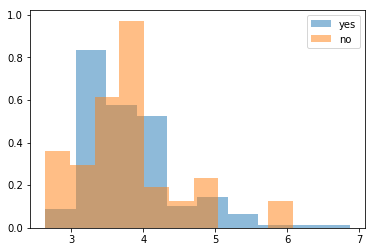

In [131]:
F_corrs = np.array([size_corr_F['yes'],size_corr_F['no']])
print(H_corrs.shape)
_ = plt.hist(size_corr_F['yes'], alpha = 0.5, label = 'yes',bins=10, density = True)
_ = plt.hist(size_corr_F['no'], alpha = 0.5, label = 'no',bins=10, density = True)
plt.legend(loc='upper right')

# Redo Particle Stats After H Relabel 7/25/2018

In [2]:
data_dir = '/Users/cgroschner/Box Sync/Research/HR-TEM/particleRecognition/*'

data_files = glob(data_dir)

label_dict = {'101729F':{'yes':0,'no':0,'null':0},'101727H':{'yes':0,'no':0,'null':0}}
size_dict = {'101729F':[],'101727H': []}
for file in data_files:
    yes = 0
    no = 0
    null = 0
    txt_names = file + '/*/adjustedPNG2/*.txt' 
    txt_files = glob(txt_names)
    for txt in txt_files:
        if '101727H' in txt.split('/')[-3]:
            sample = '101727H'
        elif '101729F' in txt.split('/')[-3]:
            sample = '101729F'
        else:
            print(txt.split('/')[-3])
            raise RuntimeError('Sample not identified or of unexpected label. Please check file naming scheme.')
        _, radii, labels, _ = ls.txt_reader(txt)
        for label in labels:
            if label == 'yes':
                label_dict[sample]['yes']+=1
            elif label == 'no':
                label_dict[sample]['no']+=1
            elif label == 'null':
                label_dict[sample]['null']+=1
        for radius in radii:
            size_dict[sample].append(radius)

size_corr_H  = {'yes':[],'no': [], 'null': []}
size_corr_F = {'yes':[],'no': [], 'null': []}
for file in data_files:
    txt_names = file + '/*/adjustedPNG2/*.txt' 
    txt_files = glob(txt_names)
    for txt in txt_files:
        if '101727H' in txt.split('/')[-3]:
            sample = '101727H'
        elif '101729F' in txt.split('/')[-3]:
            sample = '101729F'
        else:
            print(txt.split('/')[-3])
            raise RuntimeError('Sample not identified or of unexpected label. Please check file naming scheme.')
        _, radii, labels, _ = ls.txt_reader(txt)
        for idx, label in enumerate(labels):
            if label == 'yes':
                if sample == '101727H':
                    size_corr_H['yes'].append(radii[idx]*0.033*2)
                else:
                    size_corr_F['yes'].append(radii[idx]*0.033*2)
            elif label == 'no':
                if sample == '101727H':
                    size_corr_H['no'].append(radii[idx]*0.033*2)
                else:
                    size_corr_F['no'].append(radii[idx]*0.033*2)
            elif label == 'null':
                if sample == '101727H':
                    size_corr_H['null'].append(radii[idx]*0.033*2)
                else:
                    size_corr_F['null'].append(radii[idx]*0.033*2)

In [3]:
label_dict

{'101729F': {'yes': 213, 'no': 138, 'null': 871},
 '101727H': {'yes': 154, 'no': 192, 'null': 855}}

# Particle Stats:

## Stats on 101727H

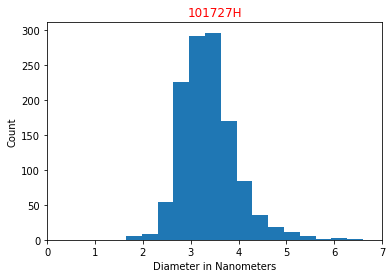

In [4]:
_ = plt.hist(np.multiply(size_dict['101727H'],0.033*2),bins =15)
_= plt.title('101727H',color = 'r')
_ = plt.xlabel('Diameter in Nanometers')
_ = plt.ylabel('Count')
# _ = plt.ylim([0,350])
_ = plt.xlim([0,7])

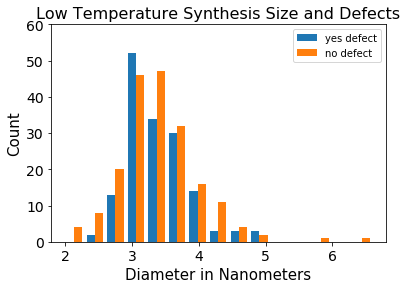

In [17]:
H_corrs = np.array([size_corr_H['yes'],size_corr_H['no']])
_ = plt.hist(H_corrs, label = ['yes defect','no defect'], bins = 15)#,density = True)
plt.legend(loc='upper right')
plt.ylim([0,60])
plt.title('Low Temperature Synthesis Size and Defects', fontsize = 16)
_ = plt.xlabel('Diameter in Nanometers', fontsize = 15)
ax = plt.gca()
ax.tick_params(axis = 'both',labelsize=14)
_ = plt.ylabel('Count', fontsize = 15)

In [5]:
print('*101727H Stats*')
print('\n')
print('mean diameter: {0:.2f}, std: {1:.2f}'.format(np.array(size_dict['101727H']).mean()*0.033*2,np.array(size_dict['101727H']).std()*0.033))
print('\n')
sum_101727H = label_dict['101727H']['yes'] + label_dict['101727H']['no'] + label_dict['101727H']['null']
print('total particles identified: {}'.format(sum_101727H))
print('\n')
print('Makeup of labeled particles: yes {0:.2f}%, no {1:.2f}%, null {2:.2f}%'.format(label_dict['101727H']['yes']/sum_101727H*100,label_dict['101727H']['no']/sum_101727H*100,label_dict['101727H']['null']/sum_101727H*100))
percent_yes = (label_dict['101727H']['yes']/(label_dict['101727H']['yes']+label_dict['101727H']['no']))*100
percent_no = (label_dict['101727H']['no']/(label_dict['101727H']['yes']+label_dict['101727H']['no']))*100
print('Makeup of atomic resolution particles: yes {0:.2f}%, no {1:.2f}%'.format(percent_yes,percent_no))


*101727H Stats*


mean diameter: 3.35, std: 0.28


total particles identified: 1201


Makeup of labeled particles: yes 12.82%, no 15.99%, null 71.19%
Makeup of atomic resolution particles: yes 44.51%, no 55.49%


In [6]:
H_nm_array = np.multiply(np.array(size_dict['101727H']),0.033*2)
H_skew = skew(H_nm_array)
print(H_skew)
skewtest(H_nm_array)

0.9654852872172256


SkewtestResult(statistic=11.741822873473323, pvalue=7.779143257585658e-32)

## Stats on 101729F

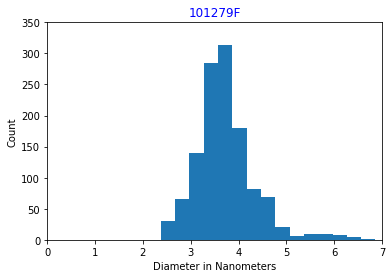

In [7]:
_ = plt.hist(np.multiply(size_dict['101729F'],0.033*2),bins =15)
_ = plt.title('101279F', color = 'b')
_ = plt.xlabel('Diameter in Nanometers')
_ = plt.ylabel('Count')
_ = plt.ylim([0,350])
_ = plt.xlim([0,7])

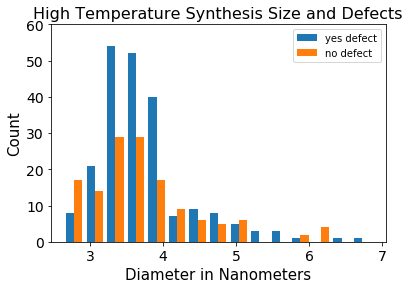

In [18]:
F_corrs = np.array([size_corr_F['yes'],size_corr_F['no']])
_ = plt.hist(F_corrs, label = ['yes defect','no defect'], bins = 15)#,density = True)
plt.legend(loc='upper right')
plt.ylim([0,60])
plt.title('High Temperature Synthesis Size and Defects', fontsize = 16)
_ = plt.xlabel('Diameter in Nanometers', fontsize = 15)
ax = plt.gca()
ax.tick_params(axis = 'both',labelsize=14)
_ = plt.ylabel('Count', fontsize = 15)

In [8]:
print('*101729F Stats*')
print('\n')
print('mean diameter: {0:.2f}, std: {1:.2f}'.format(np.array(size_dict['101729F']).mean()*0.033*2,np.array(size_dict['101729F']).std()*0.033))
print('\n')
sum_101729F = label_dict['101729F']['yes'] + label_dict['101729F']['no'] + label_dict['101729F']['null']
print('total particles identified: {}'.format(sum_101729F))
print('\n')
print('Makeup of labeled particles: yes {0:.2f}%, no {1:.2f}%, null {2:.2f}%'.format(label_dict['101729F']['yes']/sum_101729F*100,label_dict['101729F']['no']/sum_101729F*100,label_dict['101729F']['null']/sum_101729F*100))
percent_yes = (label_dict['101729F']['yes']/(label_dict['101729F']['yes']+label_dict['101729F']['no']))*100
percent_no = (label_dict['101729F']['no']/(label_dict['101729F']['yes']+label_dict['101729F']['no']))*100
print('Makeup of atomic resolution particles: yes {0:.2f}%, no {1:.2f}%'.format(percent_yes,percent_no))

*101729F Stats*


mean diameter: 3.71, std: 0.30


total particles identified: 1222


Makeup of labeled particles: yes 17.43%, no 11.29%, null 71.28%
Makeup of atomic resolution particles: yes 60.68%, no 39.32%


In [9]:
F_nm_array = np.multiply(np.array(size_dict['101729F']),0.033*2)
F_skew = skew(F_nm_array)
print(F_skew)
skewtest(F_nm_array)

1.4399238730611885


SkewtestResult(statistic=15.6713401335474, pvalue=2.3751800003390184e-55)

## Shape Distribution

In [2]:
C_F = [3.13,2.47,3.85,3.05,2.92,2.38,2.59,2.9,5.28,4.74,4.18,3.14,2.38,4.33,4.29,3.42,4.45,3.09,3.06,3.2,3.33,3.28,3.13]

In [3]:
A_F = [1.47,2.22,2.71,2.72,2.05,2.2,2.1,2.42,3.74,3.93,3.2,2.07,1.97,3.47,2.63,2.69,3.78,2.63,2.46,2.33,2.5,2.57,2.83]

In [4]:
CA_F = []
for idx, C in enumerate(C_F):
    CA_F.append(C/A_F[idx])

(1, 1.8)

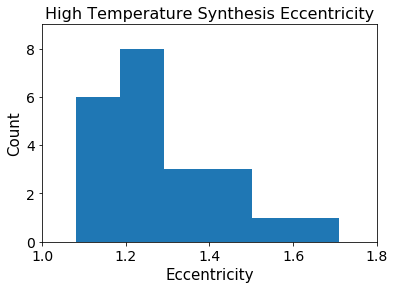

In [45]:
_ = plt.hist(CA_F, bins = 10)#,density = True)
plt.title('High Temperature Synthesis Eccentricity', fontsize = 16)
_ = plt.xlabel('Eccentricity', fontsize = 15)
ax = plt.gca()
ax.tick_params(axis = 'both',labelsize=14)
_ = plt.ylabel('Count', fontsize = 15)
plt.ylim([0,9])
plt.xlim([1,1.8])

In [5]:
C_H = [2.88,3.08,2.99,3.17,3.17,2.9,3.47,3.32,2.76,3.32,2.19,2.8,3.04,3.12,3.66,3.01,2.69,2.85,3.24,3.61]

In [6]:
A_H = [2.48,2.6,2.56,2.69,2.65,2.83,2.95,3.05,2.26,3.22,2.03,2.77,2.71,2.95,3.47,1.97,2.47,2.79,2.7,3.04]

In [7]:
CA_H = []
for idx, C in enumerate(C_H):
    CA_H.append(C/A_H[idx])

(1, 1.8)

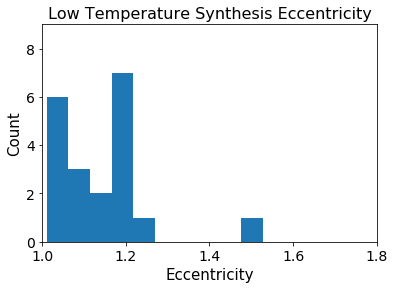

In [43]:
_ = plt.hist(CA_H, bins = 10)#,density = True)
plt.title('Low Temperature Synthesis Eccentricity', fontsize = 16)
_ = plt.xlabel('Eccentricity', fontsize = 15)
ax = plt.gca()
ax.tick_params(axis = 'both',labelsize=14)
_ = plt.ylabel('Count', fontsize = 15)
plt.ylim([0,9])
plt.xlim([1,1.8])

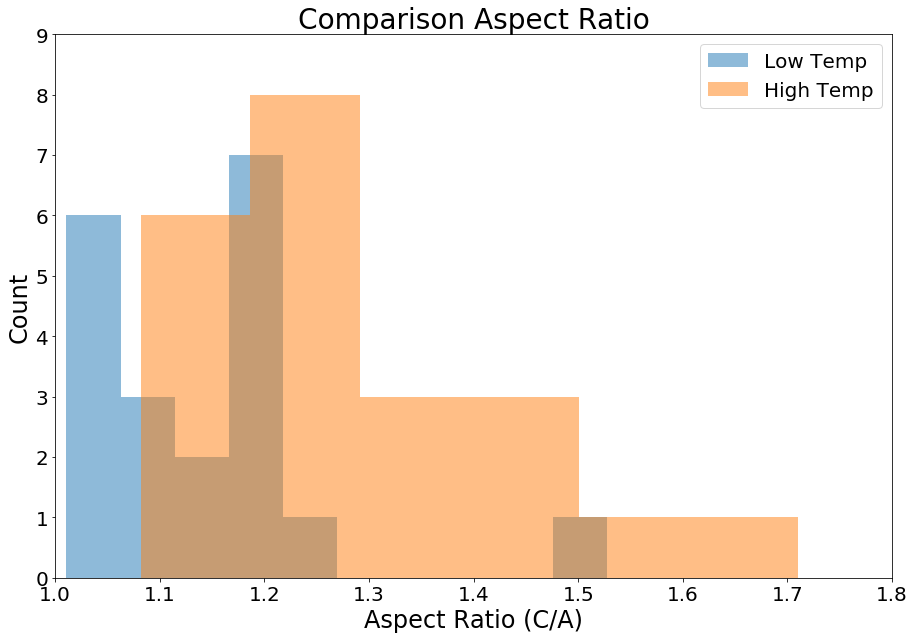

In [16]:
plt.figure(figsize=[15,10])
_ = plt.hist(CA_H, alpha = 0.5, label = 'Low Temp',bins = 10)#,density = True)
_ = plt.hist(CA_F, alpha = 0.5, label = 'High Temp',bins = 10)
plt.title('Comparison Aspect Ratio', fontsize = 28)
_ = plt.xlabel('Aspect Ratio (C/A)', fontsize = 24)
ax = plt.gca()
ax.tick_params(axis = 'both',labelsize=20)
_ = plt.ylabel('Count', fontsize = 24)
plt.ylim([0,9])
plt.xlim([1,1.8])
plt.legend(loc='upper right', fontsize = 20)
plt.savefig('aspectratio.png')

(1, 1.8)

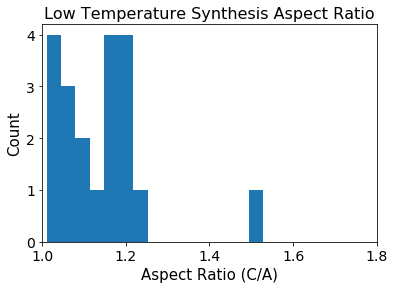

In [114]:
_ = plt.hist(CA_H, bins = 15)#,density = True)
plt.title('Low Temperature Synthesis Aspect Ratio', fontsize = 16)
_ = plt.xlabel('Aspect Ratio (C/A)', fontsize = 15)
ax = plt.gca()
ax.tick_params(axis = 'both',labelsize=14)
_ = plt.ylabel('Count', fontsize = 15)
# plt.ylim([0,9])
plt.xlim([1,1.8])

## Number of Defects per Particle

In [49]:
H_num = [1,2,1,1,1,1,1,2,1,1,1,2,1,1]

In [73]:
n = np.hist(H_num)#,density = True)
plt.title('Low Temperature Defects per Particle', fontsize = 16)
_ = plt.xlabel("Defects per Particle", fontsize = 15)
ax = plt.gca()
ax.tick_params(axis = 'both',labelsize=14)
_ = plt.ylabel('Count', fontsize = 15)
# plt.xticks(labels = [1,2])

AttributeError: module 'numpy' has no attribute 'hist'

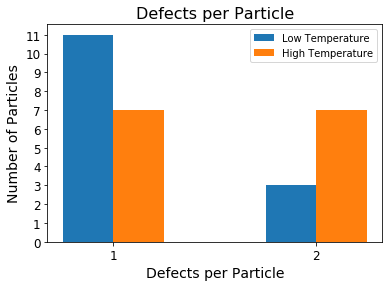

In [83]:
N = 2
H_defects = (11,3)
F_defects = (7,7)
ind = np.arange(N)    # the x locations for the groups
width = 0.25       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind-width/2, H_defects, width)
p2 = plt.bar(ind+width/2, F_defects, width)

plt.ylabel('Number of Particles', fontsize = 14)
plt.xlabel('Defects per Particle', fontsize = 14)
plt.title('Defects per Particle', fontsize = 16)
plt.xticks(ind, ('1', '2'))
plt.yticks(np.arange(0, 12))
plt.legend((p1[0], p2[0]), ('Low Temperature', 'High Temperature'))
ax = plt.gca()
ax.tick_params(axis = 'both',labelsize=12)
plt.show()

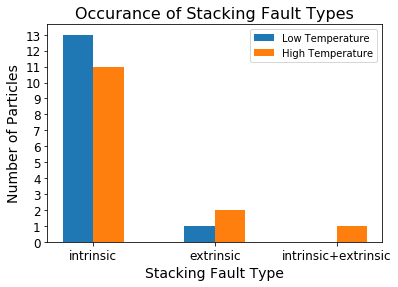

In [92]:
N = 3
H_defects = (13,1,0)
F_defects = (11,2,1)
ind = np.arange(N)    # the x locations for the groups
width = 0.25       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind-width/2, H_defects, width)
p2 = plt.bar(ind+width/2, F_defects, width)

plt.ylabel('Number of Particles', fontsize = 14)
plt.xlabel('Stacking Fault Type', fontsize = 14)
plt.title('Occurance of Stacking Fault Types', fontsize = 16)
plt.xticks(ind, ('intrinsic', 'extrinsic', 'intrinsic+extrinsic'))
plt.yticks(np.arange(0, 14))
plt.legend((p1[0], p2[0]), ('Low Temperature', 'High Temperature'))
ax = plt.gca()
ax.tick_params(axis = 'both',labelsize=12)
plt.show()

## High Temp Distribution of Stacking Fault Type with Size

In [93]:
intrinsic_F_size = [6.612,8.214,6.659,7.494,4.833,18.477,15.882,13.824,7.616,8.574,8.423]
extrinsic_mix_F_size =[9.495,15.674,7.215]

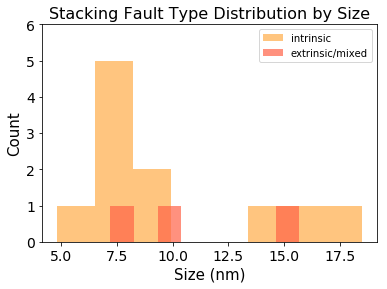

In [102]:
_ = plt.hist(intrinsic_F_size, alpha = 0.5, label = 'intrinsic',bins = 8, color = 'darkorange')#,density = True)
_ = plt.hist(extrinsic_mix_F_size, alpha = 0.7, label = 'extrinsic/mixed',bins = 8, color = 'tomato')
plt.title('Stacking Fault Type Distribution by Size', fontsize = 16)
_ = plt.xlabel('Size (nm)', fontsize = 15)
ax = plt.gca()
ax.tick_params(axis = 'both',labelsize=14)
_ = plt.ylabel('Count', fontsize = 15)
plt.ylim([0,6])
plt.legend(loc='upper right')

## High Temp Number of Defects by Size

In [105]:
F_size2 = [6.659,7.494,4.833,18.477,15.882,8.423,15.674]
F_size1 = [6.612,8.214,13.824,7.616,8.574,9.495,7.215]
F_num = [2,2,1,1,1,1,1,2,2,2,1,2,1,2]

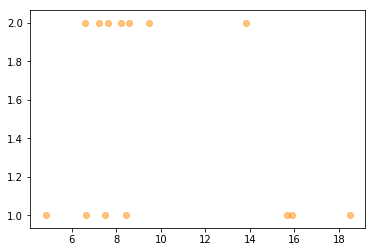

In [104]:
plt.scatter(F_size,F_num, c= 'darkorange', alpha = 0.5)

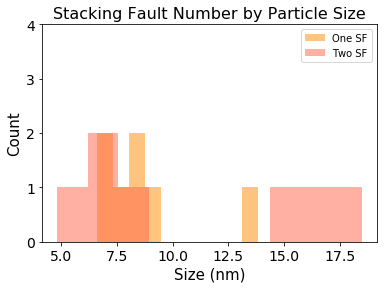

In [111]:
_ = plt.hist(F_size1, alpha = 0.5, label = 'One SF',bins = 10, color = 'darkorange')#,density = True)
_ = plt.hist(F_size2, alpha = 0.5, label = 'Two SF',bins = 10, color = 'tomato')
plt.title('Stacking Fault Number by Particle Size', fontsize = 16)
_ = plt.xlabel('Size (nm)', fontsize = 15)
ax = plt.gca()
ax.tick_params(axis = 'both',labelsize=14)
_ = plt.ylabel('Count', fontsize = 15)
plt.ylim([0,4])
plt.legend(loc='upper right')

In [ ]:
testImages = np.load('/Users/kategroschner/Box Sync/Research/testSynthImages.npy')
testMasks = np.load('/Users/kategroschner/Box Sync/Research/testSynthImages.npy')